# __Clasificacion de problemas en Inteligencia Artifical segun la respuesta de salida__

### Problemas de $Clasificaci$ó$n$

Cuando la predicción de la Inteligencia Artificial es una salida discreta o binaria.

* **Salida discreta.**
    - Problemas donde la IA tiene que predecir si el precio del dolar sube, baja o se mantiene igual. Es un problema con tres posibles salidas.
    - Sea el caso en que la IA tiene que predecir una especie de una flor. Es un problema con tres posibles salidas: Virginica, Setosa y Versicolor.
    - Sea un problema médico donde la IA tiene que predecir el diagnóstico de un paciente entre 10 posibles enfermendades.

* **Salida binaria.**
    - Problemas donde la IA tiene que predecir si un cliente hará o no una compra.
    - Sea el caso en que la IA tiene que predecir si una transacción con unan tarjeta de crédito en fraudulenta o no.
    - Sea un problema médico donde la IA tiene que predecir si el paciente es positivo para cancer o no.

### Problemas de $Regresión$

Cuando la predicción de la Inteligencia Artificial es una salida continua.

* Predecir el precio de una casa con base en algunos parámetros como tamaño, número de habitaciones, sector, etc.
* La IA debe predecir a los cuantos días va a fallar un equipo biomédico.
* La IA predice el valor del dolar al cierre de la jornada de actividad de la bolsa de valores.

# __Entendiendo los problemas de Regresion__

_Crear una herramienta de IA que prediga el precio de una casa en Medellín con base en una variables establecidas, así como se ilustra en la siguiente tabla._

| Registro | Área m^2 | # de habitaciones | # de baños | Estrato | Distancia a CC más  cercano (m) | Calificación del servicio  público (1 a 5) | Unidad  cerrada |    Precio   |
|:--------:|:--------:|:-----------------:|:----------:|:-------:|:-------------------------------:|:------------------------------------------:|:---------------:|:-----------:|
|     1    |    50    |         3         |      1     |    3    |               1000              |                      5                     |        Si       | 250.000.000 |
|     2    |    40    |         2         |      1     |    3    |               3000              |                      4                     |        No       | 160.000.000 |
|     3    |    98    |         3         |      2     |    5    |               5000              |                      2                     |        Si       | 980.000.000 |
|     4    |    55    |         3         |      2     |    4    |               1500              |                      3                     |        Si       | 450.000.000 |
|     5    |    60    |         4         |      2     |    2    |               6000              |                      4                     |        No       | 150.000.000 |
|     6    |    35    |         1         |      1     |    4    |               1000              |                      5                     |        No       | 200.000.000 |
|     7    |    64    |         3         |      1     |    6    |               3500              |                      3                     |        Si       |      **??**     |

In [1]:
# importamos librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
import random

Vamos a crear una serie de datos de prueba que sigan un comportamiento lineal similar al presentado en la tabla anterior y graficarlos en un scatterplot.

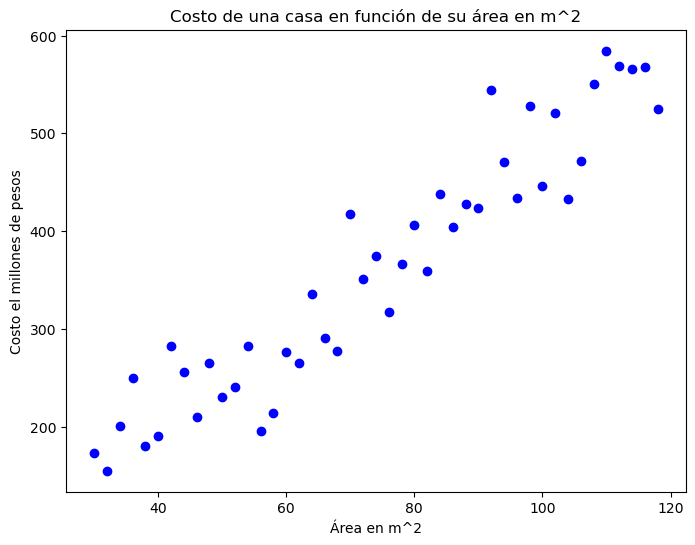

In [2]:
# funcion que genera el valor de Y a partir de un valor de X
def f(x):  
    # semilla de reproducibilidad
    np.random.seed(42) 
    # función f(x) = 5*x + 1.25 + 45*Ruido_Gaussiano
    y = 5*x + 1.25 + 45*np.random.randn(x.shape[0])
    # devuelve y
    return y

# generamos valores x de 30 a 120 en intervalos de 2
x = np.arange(30, 120, 2) 

# calculamos los valores de 'y' a partir de las 'x' generadas
y = f(x) 

# hacemos un gráfico de los datos que hemos generado
plt.figure(figsize=(8,6))
plt.scatter(x , y , label='data', color='blue')
plt.title('Costo de una casa en función de su área en m^2');
plt.xlabel('Área en m^2')
plt.ylabel('Costo el millones de pesos')
plt.show()

Ahora, creamos un modelo de regresion lineal que se ajuste a los datos para obtener sus parametros.

In [4]:
# Importación del modelo de Regresión Lineal de scikit-learn
from sklearn.linear_model import LinearRegression

# Creación de una instancia de LinearRegression
regresion_lineal = LinearRegression()

# entrenamiento de la regresión lineal con los datos (x,y)
regresion_lineal.fit(x.reshape(-1,1), y)

# Hallar los parámetros (m: pendiente  y b: intercepto) que ha estimado la regresión lineal
print('w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))

# resultado: w = [4.6693263], b = 15.988941222770848

w = [4.6693263], b = 15.988941222770848


Creamos una funcion que genere los valores de 'y' del ajuste del modelo a partir de las 'x' y los parametros de la recta.

In [5]:
# Funcion que genera los valores de 'y' del ajuste a partir de las x y los parametros de la recta
def fmodel(x):  
    w = 4.6693263
    b = 15.988941222770848
    # función f(x) = 4.6693263*x + 15.988941222770848
    y = w*x + b
    return y

Le pasamos a la funcion, valores de 'x' de un rango dado para obtener los puntos de la linea de tendencia y luego la graficamos en un Scatterplot.

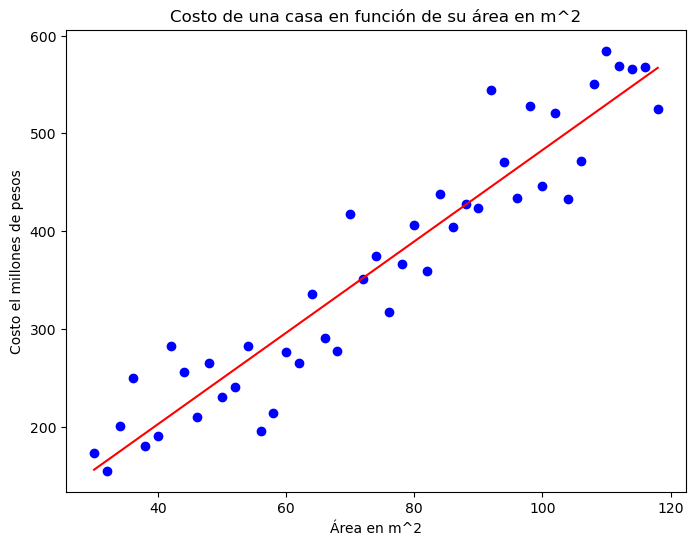

In [6]:
# generamos valores x de 30 a 120 en intervalos de 2
x_model = np.arange(30, 120, 2) 
# calculamos valores de 'y' a partir de la función fmodel()
y_model = fmodel(x_model) 


# Se crea la nube de puntos con la función f(x) previa.
# generamos valores x de 30 a 120 en intervalos de 2
x = np.arange(30, 120, 2) 
# calculamos valores de 'y' a partir de la función f()
y = f(x) 

# Línea de tendencia hallada con los valores w y b que arrojó el modelo Linear_Regression
plt.figure(figsize=(8,6))
plt.scatter(x , y , label='data', color='blue')
plt.plot(x_model , y_model , color='red')
plt.title('Costo de una casa en función de su área en m^2');
plt.xlabel('Área en m^2')
plt.ylabel('Costo el millones de pesos')
plt.show()

### Caso #1:  Predecir el precio de una casa que tiene un área de contrucción de $88m^2$

Para obtener dicho valor, la IA ubica el area dada en la linea de ajuste del modelo y encuentra el precio correspondiente; Este proceso se evidencia a traves de las lineas azules en la grafica.

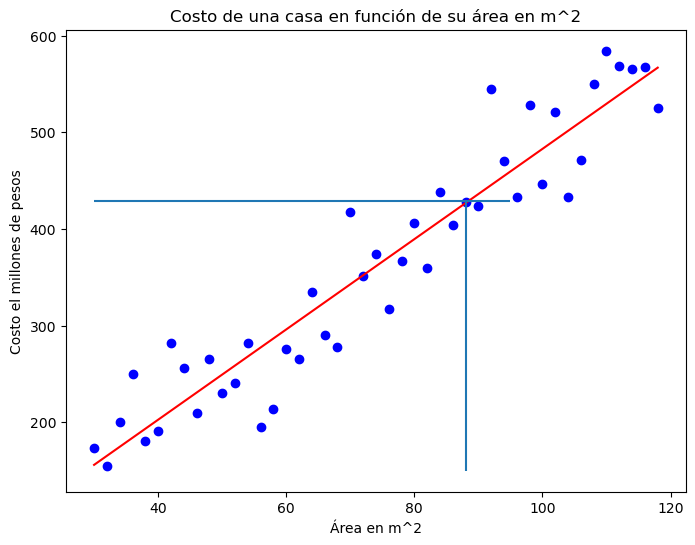

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x , y , label='data', color='blue')
plt.plot(x_model , y_model , color='red')
plt.vlines(x=88, ymin=150, ymax=430)
plt.hlines(y=429, xmin=30, xmax=95)
plt.title('Costo de una casa en función de su área en m^2');
plt.xlabel('Área en m^2')
plt.ylabel('Costo el millones de pesos')
plt.show()

> La IA predice que el valor de una casa de $88m^2$ es de $\$429.000.000$.

# Caso #2
## Predecir el precio de una casa que tiene un área de contrucción de $56m^2$

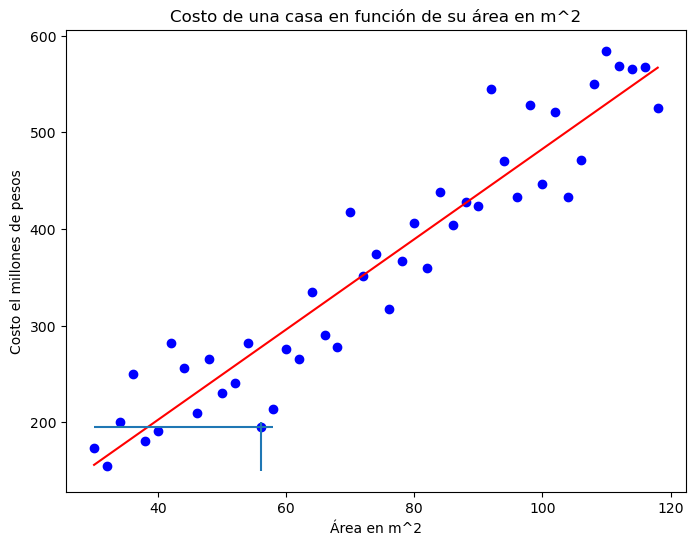

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x , y , label='data', color='blue')
plt.plot(x_model , y_model , color='red')
plt.vlines(x=56, ymin=150, ymax=200)
plt.hlines(y=195, xmin=30, xmax=58)
plt.title('Costo de una casa en función de su área en m^2');
plt.xlabel('Área en m^2')
plt.ylabel('Costo el millones de pesos')
plt.show()

## Es posible que el predictor de equivoque.

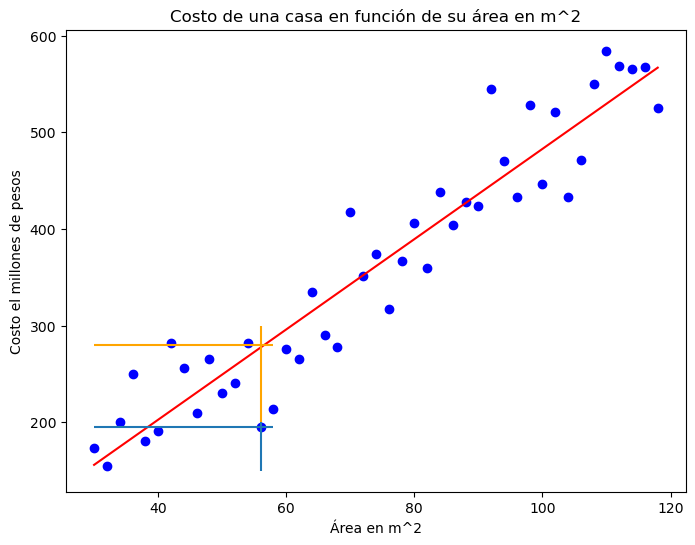

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x , y , label='data', color='blue')
plt.plot(x_model , y_model , color='red')
plt.vlines(x=56, ymin=150, ymax=200)
plt.vlines(x=56, ymin=200, ymax=300, color='orange')
plt.hlines(y=195, xmin=30, xmax=58)
plt.hlines(y=280, xmin=30, xmax=58, color='orange')
plt.title('Costo de una casa en función de su área en m^2');
plt.xlabel('Área en m^2')
plt.ylabel('Costo el millones de pesos')
plt.show()

### La IA dijo que el valor de una casa de $56m^2$ es de $\$280.000.000$, pero en realidad esa casa vale $\$195.000.000$. Cometió un <u>error</u> de $\$85.000.000$

# Caso #3
## Predecir el precio de una casa que tiene un área de contrucción de $92m^2$

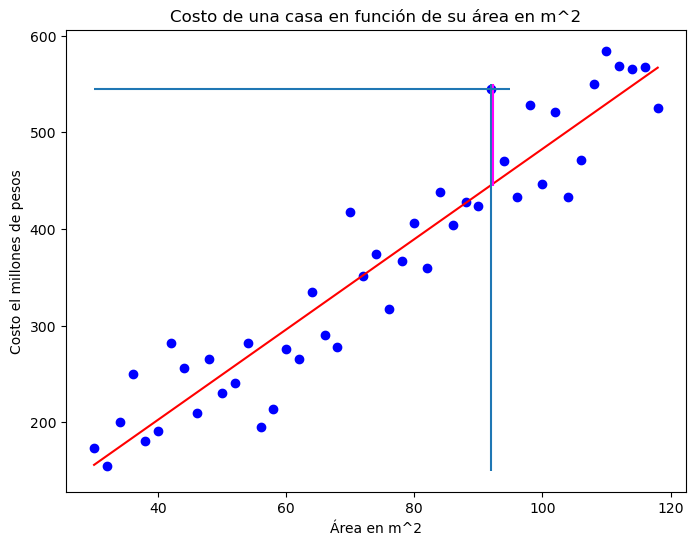

In [ ]:
# Gráfico con los datos generado y la línea de tendencia
plt.figure(figsize=(8,6))
plt.scatter(x , y , label='data', color='blue')
plt.plot(x_model , y_model , color='red')
plt.vlines(x=92, ymin=150, ymax=550)
plt.vlines(x=92.3, ymin=445, ymax=550, color='magenta')
plt.hlines(y=545, xmin=30, xmax=95)
plt.title('Costo de una casa en función de su área en m^2');
plt.xlabel('Área en m^2')
plt.ylabel('Costo el millones de pesos')
plt.show()

### La IA dijo que el valor de una casa de $92m^2$ es de $\$545.000.000$, pero en realidad esa casa vale $\$445.000.000$. Cometió un <u>error</u> de $\$100.000.000$

### Para poder medir los errores que está cometiendo la IA, debemos seguir la siguiente ecación.

1. $Error_{m1} = Valor\_real_{m1} - Valor\_pred_{m1}$
2. $Error_{m2} = Valor\_real_{m2} - Valor\_pred_{m2}$
3. $Error_{m3} = Valor\_real_{m3} - Valor\_pred_{m3}$

### Se calculan los errores con los datos numéricos obtenidos.

1. $Error_{m1} = 490M - 490M = 0M$
2. $Error_{m2} = 195M - 280M = -85M$
3. $Error_{m2} = 545M - 445M = 100M$

### Se promedian los errores calculado.
- No se pueden tener errores negativos. Es como si dijéramos que un producto vale $-85M$, esto no es posible.
- Por lo anterior, los errores siempre se toman positivos.
- Para sacar el promedio, sumamos todos los errores y dividimos entre la cantidad de errores sumados.

En nuesto ejemplo anterior, son tres errores, lo que quiere decir que sumamos las tres mediciones de error y dividimos entre tres, así.

# $Error_{Total} = \frac{Error_{m1}\ +\ Error_{m2}\ +\ Error_{m3}}{3}$

# $Error_{Total} = \frac{0\ +\ 85\ +\ 100}{3}$

# $Error_{Total} = \frac{185}{3}$

# $Error_{Total} = 61.67M$

# MÉTRICAS DE ERROR PARA PROBLEMAS DE REGRESIÓN

## _1) Error Cuadrático Medio - Mean Squared Error (MSE)_


Es el promedio de los cuadrados de los errores de cada muestra del conjunto de datos que estamos evaluando, donde el error es la diferencia entre el valor real y el valor de predicción por parte la red neuronal y está dado por la siguiente ecuación.

### $MSE = \frac{1}{n}\displaystyle\sum_{i=1}^{n}(y_i\ - \ y ̂_i)^2$

Donde;<br>
$n$ : es el número de muestras a las que se les está calculando el error.<br>
$y_i$ : es el valor _real_ de cada muestra.<br>
$y ̂_i$ : es el valor de _predicción_ de cada muestra.<br>


#### Ejercicio #1:
Tenemos las eficiencias reales de una vacuna experimental para el COVID en función de la dosis (mg/dL) aplicada y las eficiencias que el algoritmo de IA predijo que podrían tener. Hallar el $MSE$ de la IA .

$y\_true\ =\ [88.04,\ 49.89,\ 65.36,\ 71.12,\ 74.93,\ 97.19,\ 71.67,\ 83.87,\ 65.92,\ 95.4 ]$ <br>
$y\_pred\ =\ [89.11,\ 44.33,\ 61.95,\ 67.77,\ 68.25,\ 92.58,\ 69.6 ,\ 89.81,\ 61.62,\ 91.65]$

In [ ]:
# Se hace la importación de la librería Numpy
import numpy as np

In [ ]:
# Se inicializan las variables con las mediciones reales y las de la predicción del algoritmo de IA
y_true = np.array([88.04, 49.89, 65.36, 71.12, 74.93, 97.19, 71.67, 83.87, 65.92, 95.4])
y_pred = np.array([89.11, 44.33, 61.95, 67.77, 68.25, 92.58, 69.6, 89.81, 61.62, 91.65])

Para efectos de entender un poco el funcionamiento de la ecuación del MSE, vamos a hacer el proceso paso a paso

1) Se hace la diferencia (resta) entre las eficiencias uno a uno.

In [ ]:
error_diff = y_true - y_pred
error_diff

2) Se eleva al cuadrado cada una de las diferencias de las mediciones.

In [ ]:
error_diff_2 = (error_diff)**2
error_diff_2

3) Se suman todos los cuadrados de las diferencias.

In [ ]:
error_diff_2_sum = error_diff_2.sum()
error_diff_2_sum

4) Finalmente, se divide entre el número de muestras existentes.

In [ ]:
MSE = error_diff_2_sum/y_true.shape[0]
MSE

### Utilizando la librería de Sckit-Learn
La forma gereneral de esta función es:
### $mean\_squared\_error(y\_true, y\_pred)$

In [ ]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_true , y_pred)
MSE

La respuesta del error a este problema sería: $19.29\ mg^2/dL^2$

## _2) Raíz Cuadrada del Error Cuadrático Medio - Root Mean Squared Error (RMSE)_


Es el mismo concepto del MSE y como su nombre lo indica, la diferencia radica en que RMSE se obtiene sacando la raíz cuadrada al MSE.

### $RMSE = \sqrt{\frac{1}{n}\displaystyle\sum_{i=1}^{n}(y_i\ - \ y ̂_i)^2}$

Donde;<br>
$n$ : es el número de muestras a las que se les está calculando el error.<br>
$y_i$ : es el valor _real_ de cada muestra.<br>
$y ̂_i$ : es el valor de _predicción_ de cada muestra.<br>


Con esta métrica del RMSE podemos eliminar los cuadrados en las unidades de $mg^2/dL^2$ del ejemplo anterior.

### $RMSE = \sqrt{19.29\ mg^2/dL^2}$

<b>NOTA:</b> Se debe aclarar que la librería $sklearn$ no tiene un método implementado para $RMSE$, solo se debe hallar la raíz cuadrada de $MSE$

In [ ]:
RMSE = np.sqrt(MSE)
RMSE

La respuesta del error a este problema sería: $ 4.39\ mg^2/dL^2$

## _3) Error Absoluto Medio - Mean Absolute Error (MSE)_


Para el cálculo de este error, la ecuación es muy similar a la del MSE, la diferencia radica en que la eliminación de los negativos en las restas se hace con la función valor absoluto.

### $MAE = \frac{1}{n}\displaystyle\sum_{i=1}^{n} |y_i\ - \ y ̂_i|$

Donde;<br>
$n$ : es el número de muestras a las que se les está calculando el error.<br>
$y_i$ : es el valor _real_ de cada muestra.<br>
$y ̂_i$ : es el valor de _predicción_ de cada muestra.<br>


#### Ejercicio #2:
Hallar el MAE para el problema de las eficiencias según las dosis de la vacuna.

In [ ]:
# Se inicializas las variables con las mediciones reales y las de la predicción del algoritmo de IA
y_true = np.array([88.04, 49.89, 65.36, 71.12, 74.93, 97.19, 71.67, 83.87, 65.92, 95.4])
y_pred = np.array([89.11, 44.33, 61.95, 67.77, 68.25, 92.58, 69.6, 89.81, 61.62, 91.65])

1) Se hace la diferencia entre los valores uno a uno.

In [ ]:
error_diff = y_true - y_pred
error_diff

2) Se aplica la función __Valor Absoluto__ a cada una de las diferencias de las mediciones.

In [ ]:
error_diff_abs = np.absolute(error_diff)
error_diff_abs

3) Se suman todos los __Valores Absolutos__ de las diferencias.

In [ ]:
error_diff_abs_sum = error_diff_abs.sum()
error_diff_abs_sum

4) Finalmente, se divide entre el número de muestras existentes.

In [ ]:
MAE = error_diff_abs_sum/y_true.shape[0]
MAE

### Utilizando la librería de Sckit-Learn
La forma gereneral de esta función es:
### $mean\_absolute\_error(y\_true, y\_pred)$

In [ ]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_true , y_pred)
MAE